## week 2

In [1]:
import numpy as np
import cv2
import math
% matplotlib inline
from matplotlib import pyplot as plt

In [2]:
def medianBlur(img, kernel, padding_way):
    '''
    @param img: H * W size numpy.ndarray
    @param kernel: m * n size numpy.ndarray
    @param padding_way: a string, either "REPLICA" or "ZERO"
    '''
    #H, W = img.shape
    H = img.shape[0]
    W = img.shape[1]
    m, n = kernel.shape

    # padding size
    ph = m - 1
    pw = n - 1
    
    paddingUp = ph // 2
    paddingDown = ph - paddingUp
    paddingLeft = pw // 2
    paddingRight = pw - paddingLeft
    
    padding_img = np.zeros((H+ph, W+pw))
    
    if padding_way == "REPLICA":
        # padding the img
        # padding the rows
        for i in range(paddingUp):
            padding_img[i, paddingLeft: paddingLeft+W] = img[0, :]
        for i in range(paddingUp, paddingUp+H):
            padding_img[i, paddingLeft: paddingLeft+W] = img[i-paddingUp, :]
        for i in range(paddingUp+H, paddingUp+H+paddingDown): 
            padding_img[i,paddingLeft: paddingLeft+W] = img[-1, :]
        # padding the cols
        for i in range(paddingLeft):
            padding_img[:, i] = padding_img[:, paddingLeft]
        for i in range(paddingLeft+W, paddingLeft+W+paddingRight):
            padding_img[:, i] = padding_img[:, paddingLeft+W-1]
    elif padding_way == "ZERO":
        for i in range(paddingUp, paddingUp+H):
            padding_img[i, paddingLeft: paddingLeft+W] = img[i-paddingUp, :]
    # convert to uint8
    padding_img = padding_img.astype('uint8')
    out_img = padding_img
    newH = padding_img.shape[0]
    newW = padding_img.shape[1]
    # filter the paddding img
    for i in range(H):
        for j in range(W):
            vec = []
            for ki in range(i, i+m):
                for kj in range(j, j+n):
                    vec.append(padding_img[ki, kj])
            # find median pixel value
            vec.sort()
            out_img[i, j] = vec[(len(vec)+1)//2]
    # convert to uint8
    out_img = out_img.astype('uint8')
    
    return out_img

 ### About The Time Complexity
 The time complexity depends on how fast our algorithm is to find the median number of a list. As far as I know, the <b>sort()</b> method of <b>list</b> uses <b>TimSort</b> which can achieve <b>O(nlogn)</b>. So total time complexity of my code is <b>O(W$\times$H$\times$m$\times$n$\times$nlogn)
</b>. I believe it's impossible to achieve <b>O(W$\times$H$\times$m$\times$n)</b>.

In [3]:
img = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Lena', img)
kernel = np.ones((5, 5))
# test replica
out_img1 = medianBlur(img, kernel, "REPLICA")
cv2.imwrite('Blur_Lena_REPLICA.png', out_img1)
cv2.imshow('out_img1', out_img1)
# test zero
out_img2 = medianBlur(img, kernel, "ZERO")
cv2.imwrite('Blur_Lena_ZERO.png', out_img2)
cv2.imshow('out_img2', out_img2)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

## Ransac algorithm demo

In [4]:
x = np.arange(-25, 25, 1)
y1 = 2*x + 1
y2 = -0.5*x + 6

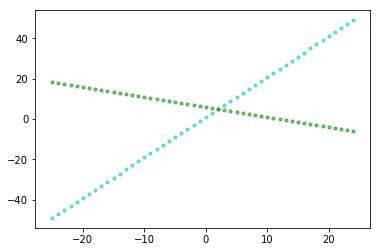

In [5]:
# two sets of points
plt.scatter(x, y1, s=10, c='c', alpha=0.5)
plt.scatter(x, y2, s=10, c='g', alpha=0.5)

In [6]:
# shuffle sets
points1 = np.vstack((x, y1))
points2 = np.vstack((x, y2))
points = np.hstack((points1, points2))
points = points.T
np.random.shuffle(points)
# best parameters
best_k = np.inf
best_b = np.inf
now_k = 0
now_b = 0
# inliers
index1 = np.random.randint(0, 100)
index2 = np.random.randint(0, 100)
inliers = []
outliers = []
inliers.append(points[index1, :])
inliers.append(points[index2, :])
for i in range(100):
    if i !=index1 and i!=index2:
        outliers.append(points[i, :])
## thresh_dist
thresh_dist = 5
## iter_times 
iter_times = 0
while iter_times < 5000:
    size = len(inliers)
    id = np.random.choice(size, 2)
    id1 = id[0]
    id2 = id[1]
    xx1 = inliers[id1][0]; yy1 = inliers[id1][1];
    xx2 = inliers[id2][0]; yy2 = inliers[id2][1];
    now_k = np.nan_to_num((yy2-yy1) / (xx2-xx1+1e-6))
    now_b = yy2 - now_k*xx2
    # compute distance for each point
    inliers.clear()
    for arr in points:
        d = abs(now_k * arr[0] - arr[1] + now_b) / math.sqrt(now_k**2 + 1**2)
        if d < thresh_dist:
            inliers.append(arr)
    iter_times += 1

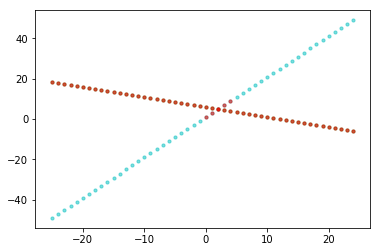

In [7]:
new_x = [arr[0] for arr in inliers]
new_y = [arr[1] for arr in inliers]
plt.scatter(x, y1, s=10, c='c', alpha=0.5)
plt.scatter(x, y2, s=10, c='g', alpha=0.5)
plt.scatter(new_x, new_y, s= 10, c= 'r', alpha=0.5)

From above figure, we can see that, the red points are inliers that cover green points with some flase blue points.